In [ ]:
# importing required libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score, root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score,  f1_score
from sklearn.linear_model import ElasticNet

In [ ]:

# data wrangling
heart_data = pd.read_csv("heart_disease_uci(1).csv")

# drop columns that have more than 50 % missing value
heart_data = heart_data.dropna(thresh=heart_data.shape[0]*0.5, axis=1)
heart_data = pd.get_dummies(heart_data, drop_first=True) # hot encoding for ctegotical features
imputer = KNNImputer(n_neighbors=15)

# imputing missing values
heart_clean =pd.DataFrame(imputer.fit_transform(heart_data))
heart_clean.columns =heart_data.columns.values
heart_clean.head()


,age,trestbps,chol,thalch,oldpeak,num,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping
0,63.0,145.0,233.0,150.0,2.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,67.0,160.0,286.0,108.0,1.5,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,67.0,120.0,229.0,129.0,2.6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,37.0,130.0,250.0,187.0,3.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,41.0,130.0,204.0,172.0,1.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
# %reset -f

In [14]:
# our target will be cholesterol levels, arrange data frame accordingly

X = heart_clean.drop(columns=['chol'],axis=1)
y = heart_clean["chol"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")




Root Mean Squared Error: 74.50152595406028
R^2 Score: 0.5306294240352698


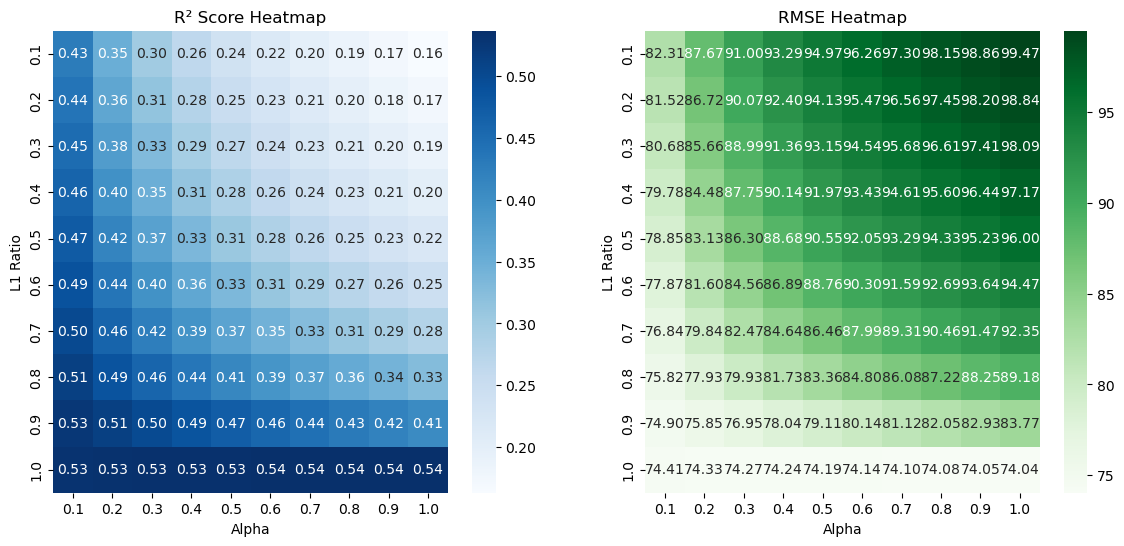

Best parameters for R2: 
 alpha        1.000000
l1_ratio     1.000000
RMSE        74.043497
R2           0.536383
Name: 99, dtype: float64
Best parameters for RMSE: 
 alpha        1.000000
l1_ratio     1.000000
RMSE        74.043497
R2           0.536383
Name: 99, dtype: float64


In [16]:
# Train a Elasticnet so regression model
alphas = np.round(np.arange(0.1, 1.1, 0.1), 1)
ratios = np.round(np.arange(0.1, 1.1, 0.1), 1)

output = []

for alp in alphas:
    for rat in ratios:
        elastic_reg = ElasticNet(alpha = alp, l1_ratio = rat)
        elastic_reg.fit(X_train, y_train)

        # Predict on the test set
        y_pred_elastic = elastic_reg.predict(X_test)


        # Evaluate the models

        rmse_elastic = root_mean_squared_error(y_test, y_pred_elastic)
        r2_elastic = r2_score(y_test, y_pred_elastic)

        output.append((alp, rat, rmse_elastic, r2_elastic))

output_data = pd.DataFrame(output, columns=['alpha', 'l1_ratio', 'RMSE','R2'])

# df_heatmap = output_data.pivot_table(index='l1_ratio', columns='alpha') not a good idea


# arrange two dataframe for heatmaps
df_r2 = output_data.pivot_table(index='l1_ratio', columns='alpha', values='R2')
df_rmse = output_data.pivot_table(index='l1_ratio', columns='alpha', values='RMSE')

# best parameters
R2_parameter = output_data.loc[output_data['R2'].idxmax()]  
RMSE_parameter = output_data.loc[output_data['RMSE'].idxmin()]


# Plot heatmaps for R2 and RMSE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(df_r2,cmap = "Blues",annot= True, fmt='.2f')
plt.title('R² Score Heatmap')
plt.xlabel('Alpha')
plt.ylabel('L1 Ratio')

plt.subplot(1, 2, 2)
sns.heatmap(df_rmse, cmap ='Greens', annot= True, fmt='.2f')
plt.title('RMSE Heatmap')
plt.xlabel('Alpha')
plt.ylabel('L1 Ratio')

plt.show()

print(f"Best parameters for R2: \n {R2_parameter}")
print(f"Best parameters for RMSE: \n {RMSE_parameter}")

Logistic Regression - Accuracy: 0.82, F1 Score: 0.84


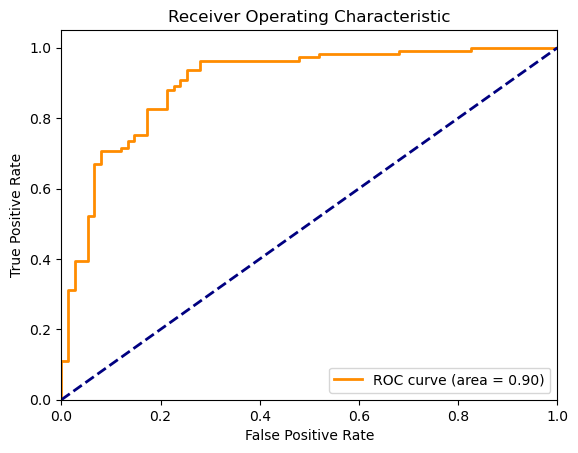

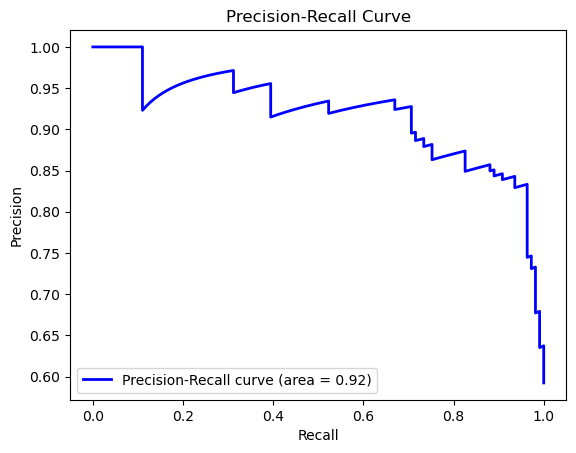

In [ ]:

# arrange data for heart conditions
X = heart_clean.drop(columns=['num'],axis=1)
y = heart_clean["num"]

mapping = {0 : 0, 1 : 1, 2 : 1, 3 : 1, 4 : 1}
y = y.map(mapping)

# print(y.unique())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(penalty = "l2", solver = "liblinear")
log_reg.fit(X_train, y_train)

# Predict probabilities
y_scores = log_reg.predict_proba(X_test)[:, 1]



# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# change y score to binary

for i in range(len(y_scores)):
    if y_scores[i] >= 0.5:
        y_scores[i] = 1
    else:
        y_scores[i] = 0


accuracy = accuracy_score(y_test, y_scores)
f1 = f1_score(y_test, y_scores)

print(f"Logistic Regression - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()



Logistic Regression - Accuracy: 0.76, F1 Score: 0.80


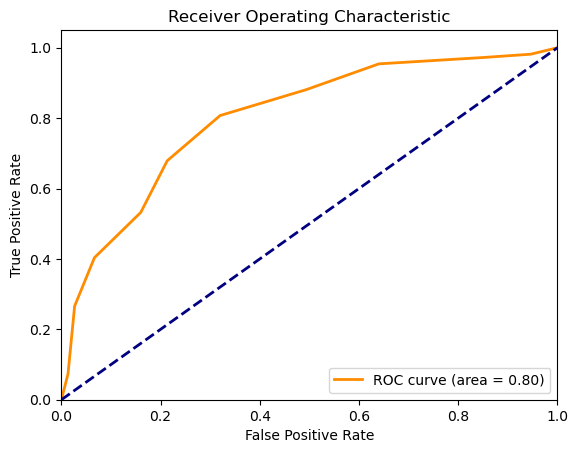

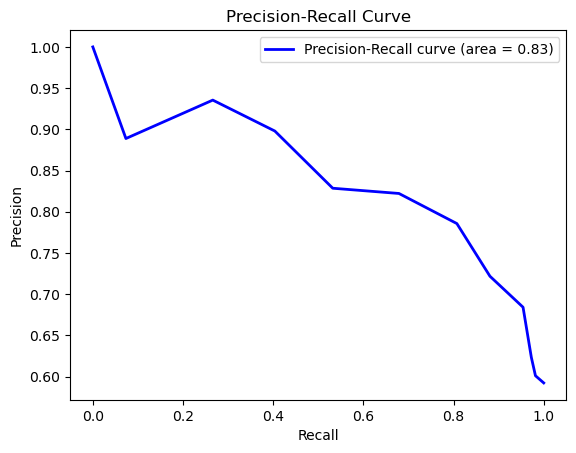

In [ ]:
X = heart_clean.drop(columns=['num'],axis=1)
y = heart_clean["num"]

mapping = {0 : 0, 1 : 1, 2 : 1, 3 : 1, 4 : 1}
y = y.map(mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
#knn.fit(scaler_mm.fit_transfrom(X_train), y_train)

# Predict probabilities
y_scores_knn = knn.predict_proba(X_test)[:, 1]
# y_scores_knn = knn.predict_proba(scaler_mm.fit_transfrom(X_test))[:, 1]
# Compute ROC curve and ROC area
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_knn)
average_precision = average_precision_score(y_test, y_scores_knn)

# change y score to binary

for i in range(len(y_scores_knn)):
    if y_scores_knn[i] >= 0.5:
        y_scores_knn[i] = 1
    else:
        y_scores_knn[i] = 0
accuracy = accuracy_score(y_test, y_scores_knn)
f1 = f1_score(y_test, y_scores_knn)

print(f"Logistic Regression - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")


# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()